<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/Darek_LS_DS_Unit_4_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
import tensorflow
from tensorflow.keras.datasets import reuters
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)



(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3,
                                                         )

# restore np.load for future normal usage
np.load = np_load_old


In [2]:
x_train.shape, y_train.shape

((8982,), (8982,))

In [0]:
num_classes = len(set(y_train))


In [0]:
# y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
# y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
y_train = tensorflow.one_hot(y_train, depth=46, axis=-1)
y_test = tensorflow.one_hot(y_test, depth=46, axis=-1)

In [7]:
from __future__ import print_function
import matplotlib.pyplot as plt
import tensorflow 
import h5py

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Dense, Embedding, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping as EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint as ModelCheckpoint


max_features = 40000
maxlen = 80
batch_size = 32

print('Loading data...')
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='sigmoid'))

# simple early stopping will watch the accuracy measure you choose
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

#you must save the model or early stopping will just cut off the training without having a model at the end to use
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# print('Train...')
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=20,
#           validation_data=(x_test, y_test), callbacks=[es,mc])
# score, acc = model.evaluate(x_test, y_test,
#                             batch_size=batch_size)
print('Train...')
model.fit(x_train, y_train,
          steps_per_epoch=batch_size,callbacks=[es,mc],
          epochs=20,
          validation_data=(x_test, y_test),
          validation_steps=batch_size)
score, acc = model.evaluate(x_test, y_test,
                            steps=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)


Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Epoch 1/20
31/32 [============================>.] - ETA: 0s - loss: 3.2576 - acc: 0.3349
Epoch 00001: val_acc improved from -inf to 0.36643, saving model to best_model.h5
32/32 [==============================] - 22s 677ms/step - loss: 3.2392 - acc: 0.3354 - val_loss: 2.6289 - val_acc: 0.3664
Epoch 2/20
31/32 [============================>.] - ETA: 0s - loss: 2.5128 - acc: 0.3506
Epoch 00002: val_acc did not improve from 0.36643
32/32 [==============================] - 21s 646ms/step - loss: 2.5104 - acc: 0.3506 - val_loss: 2.3923 - val_acc: 0.3664
Epoch 3/20
31/32 [============================>.] - ETA: 0s - loss: 2.4322 - acc: 0.3506
Epoch 00003: val_acc did not improve from 0.36643
32/32 [==============================] - 20s 638ms/step - loss: 2.4321 - acc: 0.3506 - val_loss: 2.3867 - val_acc: 0.3664
Epoch 4/20
31/32 [====

In [0]:


word_index = reuters.get_word_index(path="reuters_word_index.json")

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print("Before Decode:", '\n') 
print(x_train[100], '\n')
print("After Decode:" '\n') 
print(decode_review(x_train[100]))
'\n'
'\n'

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [0]:
!pip install google_images_download

     |████████████████████████████████| 911kB 5.1MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=d2654dd1bbdae56f1b10d79bccd660fe7e7bb02cfd7686b487f11fc21e7d97c0
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import tensorflow as tf
import tensorflow_hub as hub
import imageio
from google_images_download import google_images_download
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image, ImageOps
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.filters import gaussian
from skimage.measure import ransac
from skimage.transform import AffineTransform
from skimage import color, io
from skimage.exposure import rescale_intensity


def resize_image(filename, new_width=224, new_height=224):
    pil_image = Image.open(filename)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert('RGB')
    pil_image_rgb.save(filename, format='JPEG', quality=90)
#     print(filename)
    return filename



In [0]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 4.PKLS4116.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg

Errors: 0



In [0]:
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
height, width

(224, 224)

In [0]:
absolute_image_paths

({'animal pond': ['/content/downloads/animal pond/1.Pondanimals.GIF',
   '/content/downloads/animal pond/2.hqdefault.jpg',
   '/content/downloads/animal pond/3.PKLS4116_inline.png',
   '/content/downloads/animal pond/4.PKLS4116.png',
   '/content/downloads/animal pond/5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg']},
 0)

In [0]:
image_list = absolute_image_paths[0]['animal pond']
image_list
images = [resize_image(image) for image in image_list]
images

['/content/downloads/animal pond/1.Pondanimals.GIF',
 '/content/downloads/animal pond/2.hqdefault.jpg',
 '/content/downloads/animal pond/3.PKLS4116_inline.png',
 '/content/downloads/animal pond/4.PKLS4116.png',
 '/content/downloads/animal pond/5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg']

In [0]:
real_images = np.array([np.asarray(Image.open(image)) / 255 for image in images])
real_images.shape


logits = module(real_images)


target_map = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt').content




In [0]:


lookup = [target.strip(r"'b'").strip(r'"') for target in str(target_map).split('\\n')]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    codes = []
    for i in range(5):
        codes.append(np.argmax(logits[i].eval()))

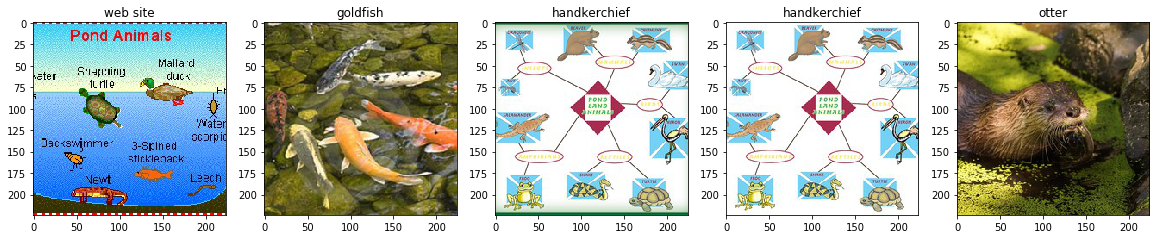

In [0]:
import math
cols = 5
rows = math.ceil(len(images)/5)
fig=plt.figure(figsize=(20, 20))
with tf.Session() as sess:
    for idx,image in enumerate(real_images):
        fig.add_subplot(rows, cols, idx+1)
        plt.imshow(image)
        plt.title(lookup[codes[idx]])
plt.savefig('animal_pond.jpg', dpi=120)
plt.show()

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [0]:
# TODO - your code!


<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ Autoencoders are can be used anomaly detection as well as image reconstruction or manipulation. Because they employ a type of dimensionality reduction similar to PCA in a sense they could be used as various forms of compression where the goal is to extract identiaible latent features. 

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist? Curiosity.
- What area of Data Science would you most like to learn more about, and why? Real time applications of big data streams and systems architecture.
- Where do you think Data Science will be in 5 years? Most tasks will be modules and packages that are point and click. The PhD. level statisticians now called Data science roles will remain but be rebranded. Data Science in general will be fragmented and absorbed by dev ops and software engineers roles described as with ML experience.
- What are the threats posed by AI to our society? In the immediate there will be a percieved threat as a true AI would be timeless, and cultureless. It could 'see' farther behind and ahead than the functional capcity of our current understanding of organic intelligence. Artificial is a misnomer in itself. The truth is there is no threat as it is the inevitablity of the collective intelligence of life. Threat is anthropormorphising the universal force that drives evolution now in our own specicies. We know so little about reality but believe so fiercely in our existence being central to the plot of the universe. The fear is a symptom of a cognitive dissonance we are imposing on ourselves as we witness the distillation of intelligence that is ever occuring, but cannot image it continuing without us in our current form. 
- How do you think we can counteract those threats? There will be a period of cultural adaptation and mostly for the privelaged the option of physically integratating, but to cling to what we are now, and the idea we are somehow going to impose our will on something so ineviteble and efficient is exactly why we in our current form will be left behind. Nature holds no nostalgia. 
- Do you think achieving General Artifical Intelligence is ever possible? Yes, it has happened before and it will always happen again. 

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")